In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter  , ScalarFormatter
import matplotlib.axes as ax
import numpy as np
import statistics as st

In [2]:
MODE = 'R'
EXP = '21'

threads = 2
num_client_machines = 3
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50 ]
clients = []

for c in connections_per_thread:
    clients.append(c*threads*num_client_machines)
clients

[6, 48, 96, 132, 168, 192, 240, 300]

In [3]:
path_c1 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client1/'
path_c2 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client2/'
path_c3 = '/home/fla/Desktop/asl-fall18-project/Experiments/Exp_2/2.1/'+str(MODE)+'_only/Client3/'

gets_c1 = {1:[], 2:[], 3:[]}
gets_c2 = {1:[], 2:[], 3:[]}
gets_c3 = {1:[], 2:[], 3:[]}

latencies_c1 = {1:[], 2:[], 3:[]}
latencies_c2 = {1:[], 2:[], 3:[]}
latencies_c3 = {1:[], 2:[], 3:[]}


for c in connections_per_thread:
    for n_try in [1, 2, 3]:
        filename_c1 = str(path_c1)+'E'+str(EXP)+str(MODE)+'OC1I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c2 = str(path_c2)+'E'+str(EXP)+str(MODE)+'OC2I1_C'+str(c)+'_try'+str(n_try)+'.log'
        filename_c3 = str(path_c3)+'E'+str(EXP)+str(MODE)+'OC3I1_C'+str(c)+'_try'+str(n_try)+'.log'
        
        file_c1 = open(filename_c1, "r")
        file_c2 = open(filename_c2, "r")
        file_c3 = open(filename_c3, "r")
        
        for line in file_c1:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    gets_c1.get(n_try).append(float(line.split()[1]))
                    latencies_c1.get(n_try).append(float(line.split()[4]))
                    
        for line in file_c2:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    gets_c2.get(n_try).append(float(line.split()[1]))
                    latencies_c2.get(n_try).append(float(line.split()[4]))
                    

                    
        for line in file_c3:
            if(len(line.split())!=0):
                if(line.split()[0]=='Gets'):
                    #print(line)
                    gets_c3.get(n_try).append(float(line.split()[1]))
                    latencies_c3.get(n_try).append(float(line.split()[4]))
                    

In [7]:
gets_c3


{1: [3918.3, 7072.33, 9265.51, 9223.97, 9430.63, 9478.32, 8948.03, 9723.31],
 2: [3988.33, 7037.13, 8824.54, 9277.04, 9459.5, 9021.61, 9408.28, 9612.2],
 3: [3982.25, 7144.83, 8980.41, 9221.14, 9384.86, 9493.36, 9596.27, 9706.43]}

##### For the throughput of sets I have the following maps :
    gets_c1 
    gets_c2 
    gets_c3 
    
##### For the latencies of sets I have the following maps:
    latencies_c1 
    latencies_c2 
    latencies_c3 


In [8]:
## Graph comparing the three clients

num_elem = len(gets_c1.get(1))
c1_means = np.zeros(num_elem)
c1_std = np.zeros(num_elem)

c2_means = np.zeros(num_elem)
c2_std = np.zeros(num_elem)

c3_means = np.zeros(num_elem)
c3_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    c1_means[i] = np.mean(np.array( [gets_c1.get(1)[i],
                          gets_c1.get(2)[i],
                          gets_c1.get(3)[i] ]
                         ))
    c1_std[i] = np.std(np.array( [gets_c1.get(1)[i],
                          gets_c1.get(2)[i],
                          gets_c1.get(3)[i] ]
                         ))
    
    
    
    c2_means[i] = np.mean(np.array( [gets_c2.get(1)[i],
                          gets_c2.get(2)[i],
                          gets_c2.get(3)[i] ]
                         ))
    c2_std[i] = np.std(np.array( [gets_c2.get(1)[i],
                          gets_c2.get(2)[i],
                          gets_c2.get(3)[i] ]
                         ))
    
    
    
    c3_means[i] = np.mean(np.array( [gets_c3.get(1)[i],
                          gets_c3.get(2)[i],
                          gets_c3.get(3)[i] ]
                         ))
    c3_std[i] = np.std(np.array( [gets_c3.get(1)[i],
                          gets_c3.get(2)[i],
                          gets_c3.get(3)[i] ]
                         ))


In [9]:
c1_means

array([3276.88333333, 7505.84      , 9381.74      , 9637.02      ,
       9949.86666667, 9731.01666667, 9725.86      , 9932.37666667])

/home/fla/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2876: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


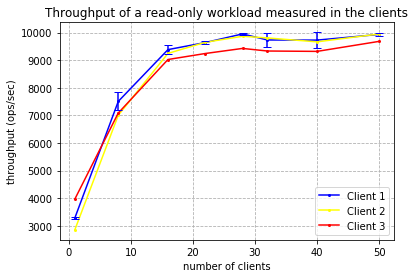

In [10]:
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50]
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('number of clients')
plt.ylabel('throughput (ops/sec)')
plt.title("Throughput of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(connections_per_thread, c1_means, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(connections_per_thread, c2_means, color='yellow', linestyle='solid', marker='o',markerfacecolor='yellow', markersize=2)
line_c3, = plt.plot(connections_per_thread, c3_means, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)

ax_lst.errorbar(connections_per_thread,c1_means, yerr=c1_std, fmt=None, ecolor='b', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c2_means, yerr=c2_std, fmt=None, ecolor='y', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c3_means, yerr=c3_std, fmt=None, ecolor='r', capthick=1, capsize=4)

plt.legend( [line_c1, line_c2, line_c3], ['Client 1', 'Client 2', 'Client 3'])

In [11]:
num_elem = len(gets_c1.get(1))
c1_latencies = np.zeros(num_elem)
c1_latencies_std = np.zeros(num_elem)

c2_latencies = np.zeros(num_elem)
c2_latencies_std = np.zeros(num_elem)

c3_latencies = np.zeros(num_elem)
c3_latencies_std = np.zeros(num_elem)

for i in range(0,num_elem,1):
    c1_latencies[i] = np.mean(np.array( [latencies_c1.get(1)[i],
                          latencies_c1.get(2)[i],
                          latencies_c1.get(3)[i] ]
                         ))
    c1_latencies_std[i] = np.std(np.array( [latencies_c1.get(1)[i],
                          latencies_c1.get(2)[i],
                          latencies_c1.get(3)[i] ]
                         ))
    
    
    
    c2_latencies[i] = np.mean(np.array( [latencies_c2.get(1)[i],
                          latencies_c2.get(2)[i],
                          latencies_c2.get(3)[i] ]
                         ))
    c2_latencies_std[i] = np.std(np.array( [latencies_c2.get(1)[i],
                          latencies_c2.get(2)[i],
                          latencies_c2.get(3)[i] ]
                         ))
    
    
    
    c3_latencies[i] = np.mean(np.array( [latencies_c3.get(1)[i],
                          latencies_c3.get(2)[i],
                          latencies_c3.get(3)[i] ]
                         ))
    c3_latencies_std[i] = np.std(np.array( [latencies_c3.get(1)[i],
                          latencies_c3.get(2)[i],
                          latencies_c3.get(3)[i] ]
                         ))


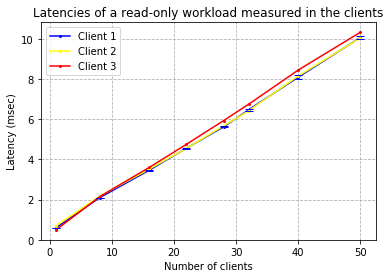

In [13]:
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50]
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (msec)')
plt.title("Latencies of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(connections_per_thread, c1_latencies, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(connections_per_thread, c2_latencies, color='yellow', linestyle='solid', marker='o',markerfacecolor='yellow', markersize=2)
line_c3, = plt.plot(connections_per_thread, c3_latencies, color='red', linestyle='solid', marker='o',markerfacecolor='red', markersize=2)

ax_lst.errorbar(connections_per_thread,c1_latencies, yerr=c1_latencies_std, fmt=None, ecolor='b', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c2_means, yerr=c2_std, fmt=None, ecolor='y', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c3_means, yerr=c3_std, fmt=None, ecolor='r', capthick=1, capsize=4)

plt.legend( [line_c1, line_c2, line_c3], ['Client 1', 'Client 2', 'Client 3'])

In [ ]:
## Graph showing the sum of the three clients' throughput

In [16]:
## Graph comparing the three clients

num_elem = len(gets_c1.get(1))
allClients_means = np.zeros(num_elem)
allClients_std = np.zeros(num_elem)
allClients_latency_means = np.zeros(num_elem)
allClients_latency_std = np.zeros(num_elem)


for i in range(0,num_elem,1):
    allClients_means[i] = np.mean(np.array( [(gets_c1.get(1)[i] + gets_c2.get(1)[i] + gets_c3.get(1)[i]),
                                    (gets_c1.get(2)[i] + gets_c2.get(2)[i] + gets_c3.get(2)[i]),
                                    (gets_c1.get(3)[i] + gets_c2.get(3)[i] + gets_c3.get(3)[i])
                                    ]
                         ))
    allClients_std[i] = np.std(np.array( [(gets_c1.get(1)[i] + gets_c2.get(1)[i] + gets_c3.get(1)[i]),
                                    (gets_c1.get(2)[i] + gets_c2.get(2)[i] + gets_c3.get(2)[i]),
                                    (gets_c1.get(3)[i] + gets_c2.get(3)[i] + gets_c3.get(3)[i])
                                    ]
                         ))

    allClients_latency_means[i] = np.mean(np.array( 
                                    [
                                    np.array(np.mean( [ c1_latencies[i], c2_latencies[i], c3_latencies[i]])),
                                    np.array(np.mean( [ c1_latencies[i], c2_latencies[i], c3_latencies[i]])),
                                    np.array(np.mean( [ c1_latencies[i], c2_latencies[i], c3_latencies[i]]))
                                    ]
                         ))
    allClients_latency_std[i] = np.std(np.array([
                                    np.array(np.mean( [ c1_latencies[i], c2_latencies[i], c3_latencies[i]])),
                                    np.array(np.mean( [ c1_latencies[i], c2_latencies[i], c3_latencies[i]])),
                                    np.array(np.mean( [ c1_latencies[i], c2_latencies[i], c3_latencies[i]]))
                                    ]
                         ))


<Container object of 3 artists>

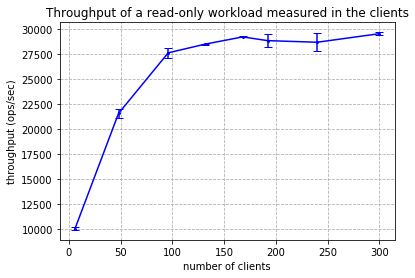

In [17]:

#USE clients
clients = [6, 48, 96, 132, 168, 192, 240, 300 ]
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('number of clients')
plt.ylabel('throughput (ops/sec)')
plt.title("Throughput of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, allClients_means, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,allClients_means, yerr=allClients_std, fmt=None, ecolor='b', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c2_means, yerr=c2_std, fmt=None, ecolor='y', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c3_means, yerr=c3_std, fmt=None, ecolor='r', capthick=1, capsize=4)


<Container object of 3 artists>

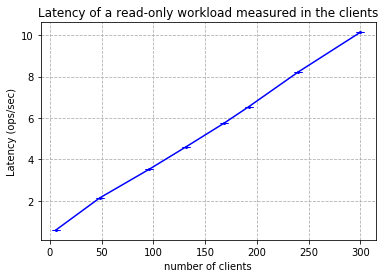

In [18]:

#USE clients
clients = [6, 48, 96, 132, 168, 192, 240, 300]
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Latency of a read-only workload measured in the clients")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients, allClients_latency_means, color='blue', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)

ax_lst.errorbar(clients,allClients_latency_means, yerr=allClients_latency_std, fmt=None, ecolor='b', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c2_means, yerr=c2_std, fmt=None, ecolor='y', capthick=1, capsize=4)
#ax_lst.errorbar(connections_per_thread,c3_means, yerr=c3_std, fmt=None, ecolor='r', capthick=1, capsize=4)
